# :)

In [41]:
import mne
import matplotlib.pyplot as plt

# Specify the path to your EDF file
file_path = 'C:/Users/Atena/OneDrive - University of Connecticut/DriveCbackup/ThirdPhaseofThesis/Recordings/aaaaaaav_s001_t000.edf'

# Read the EDF file
raw = mne.io.read_raw_edf(file_path, preload=True)

# Get basic information
print(raw.info)
print(raw.ch_names)

# Extract signal data
data, times = raw[:]

print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

# # Plot the raw EEG data
# # raw.plot(n_channels=len(raw.ch_names), duration=times[-1] - times[0], scalings='auto', title='Raw EEG Data', show=True, block=False)
# raw.plot(n_channels=10, duration=times[65400] - times[63400], scalings='auto', title='Raw EEG Data', show=True, block=False)

Extracting EDF parameters from C:\Users\Atena\OneDrive - University of Connecticut\DriveCbackup\ThirdPhaseofThesis\Recordings\aaaaaaav_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 497999  =      0.000 ...  1991.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 41 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2006-01-01 00:00:00 UTC
 nchan: 41
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'E

In [42]:
# Band-pass filter the data
raw.filter(l_freq=1.0, h_freq=50.0)

# Notch filter to remove power line noise (assuming 60 Hz)
raw.notch_filter(freqs=60.0)

# # Plot the raw EEG data after filtering
# # raw.plot(n_channels=len(raw.ch_names), duration=times[-1] - times[0], scalings='auto', title='Filtered EEG Data', show=True, block=True)
# raw.plot(n_channels=10, duration=times[65400] - times[63400], scalings='auto', title='Raw EEG Data', show=True, block=False)

# Set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
ica.fit(raw)

# Find and remove EOG artifacts
try:
    eog_inds, eog_scores = ica.find_bads_eog(raw)
    ica.exclude.extend(eog_inds)
    print(f"Excluded EOG components: {eog_inds}")
except RuntimeError as e:
    print("No EOG artifacts found:", e)

# Find and remove ECG artifacts
try:
    ecg_inds, ecg_scores = ica.find_bads_ecg(raw, method='correlation', threshold='auto')
    ica.exclude.extend(ecg_inds)
    print(f"Excluded ECG components: {ecg_inds}")
except ValueError as e:
    print("No ECG artifacts found:", e)

try:
    emg_inds, scores = ica.find_bads_muscle(raw, threshold=4)
    ica.exclude.extend(emg_inds)
    print(f"Excluded EMG components: {emg_inds}")
except RuntimeError as e:
    print("No EMG artifacts found:", e)

# Apply the ICA to the raw data
raw_ica = raw.copy()
ica.apply(raw_ica)

# Re-reference the data to the average reference
raw_ica.set_eeg_reference('average', projection=True)

# # Plot the preprocessed EEG data
# # raw_ica.plot(n_channels=len(raw_ica.ch_names), duration=times[-1] - times[0], scalings='auto', title='Preprocessed EEG Data', show=True, block=True)
# raw.plot(n_channels=10, duration=times[65400] - times[63400], scalings='auto', title='Raw EEG Data', show=True, block=False)

# # Save the preprocessed data to a new file (optional)
# preprocessed_file_path = 'C:/Users/Atena/OneDrive - University of Connecticut/DriveCbackup/ThirdPhaseofThesis/Recordings/preprocessed_data.fif'
# raw_ica.save(preprocessed_file_path, overwrite=True)

preprocEEG = raw_ica

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 41 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished


Selecting by number: 15 components
Fitting ICA took 7.4s.


C:\Users\Atena\AppData\Local\Temp\ipykernel_9212\3388091111.py:13: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (41) and smallest (2.8e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 2
  ica.fit(raw)


No EOG artifacts found: No EOG channel(s) found
No ECG artifacts found: Unable to generate artificial ECG channel
Effective window size : 8.192 (s)


No EMG artifacts found: No digitization points found.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 41 PCA components
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


In [43]:
# Define the seizure and background time intervals (in seconds)
seizure_start, seizure_end = 1273.45, 1319.18 
background_start, background_end = 0, 1273.45

# Extract seizure and background epochs
seizure_epochs = preprocEEG.copy().crop(tmin=seizure_start, tmax=seizure_end)
background_epochs = preprocEEG.copy().crop(tmin=background_start, tmax=background_end)

In [44]:
seizure_dur = (seizure_end - seizure_start)/60
background_dur = (background_end - background_start)/60

print(seizure_dur)
print(background_dur)

0.762166666666667
21.22416666666667


In [45]:
seizure_epochs

# Get basic information
print(seizure_epochs.info)
print(seizure_epochs.ch_names)

# Extract signal data
data, times = seizure_epochs[:]

print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

# # Plot the raw EEG data
# # raw.plot(n_channels=len(raw.ch_names), duration=times[-1] - times[0], scalings='auto', title='Raw EEG Data', show=True, block=False)
# seizure_epochs.plot(n_channels=10, duration=times[5400] - times[3400], scalings='auto', title='Seizure EEG Data', show=True, block=False)

<Info | 9 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 41 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2006-01-01 00:00:00 UTC
 nchan: 41
 projs: Average EEG reference: off
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'EEG 32-LE', 'PHOTIC PH', 'DC1-DC', 'DC2-DC', 'DC3-DC', 'DC4-DC', 'DC5-DC', 'DC6-DC', 'DC7-DC', 'DC8-DC']
Data shape: (41, 11434)
Times shape: (11434,)


In [46]:
background_epochs

# Get basic information
print(background_epochs.info)
print(background_epochs.ch_names)

# Extract signal data
data, times = background_epochs[:]

print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

# # Plot the raw EEG data
# # raw.plot(n_channels=len(raw.ch_names), duration=times[-1] - times[0], scalings='auto', title='Raw EEG Data', show=True, block=False)
# background_epochs.plot(n_channels=10, duration=times[5400] - times[3400], scalings='auto', title='background EEG Data', show=True, block=False)

<Info | 9 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 41 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2006-01-01 00:00:00 UTC
 nchan: 41
 projs: Average EEG reference: off
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'EEG 32-LE', 'PHOTIC PH', 'DC1-DC', 'DC2-DC', 'DC3-DC', 'DC4-DC', 'DC5-DC', 'DC6-DC', 'DC7-DC', 'DC8-DC']
Data shape: (41, 318363)
Times shape: (318363,)


In [47]:
import numpy as np
from scipy.signal import hilbert, butter, filtfilt

def bandpass_filter(data, sfreq, low_freq, high_freq):
    """
    Band-pass filter the data.
    
    Parameters:
    data (ndarray): The input signal of shape (n_channels, n_times)
    sfreq (float): The sampling frequency
    low_freq (float): The lower bound of the frequency range
    high_freq (float): The upper bound of the frequency range
    
    Returns:
    filtered_data (ndarray): The band-pass filtered signal
    """
    nyquist = 0.5 * sfreq
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

def calculate_plv(eeg_data, sfreq, low_freq, high_freq):
    """
    Calculate the Phase Locking Value (PLV) between pairs of EEG channels.
    
    Parameters:
    eeg_data (ndarray): EEG data of shape (n_channels, n_times)
    sfreq (float): Sampling frequency of the EEG data
    low_freq (float): Lower frequency bound for band-pass filter (default 8 Hz)
    high_freq (float): Upper frequency bound for band-pass filter (default 13 Hz)
    
    Returns:
    plv_matrix (ndarray): PLV matrix of shape (n_channels, n_channels)
    """
    n_channels, n_times = eeg_data.shape
    plv_matrix = np.zeros((n_channels, n_channels))
    
    # Band-pass filter the data in the specified frequency band
    eeg_data_filtered = bandpass_filter(eeg_data, sfreq, low_freq, high_freq)
    
    # Compute the analytic signal (Hilbert transform) to get the phase
    analytic_signal = hilbert(eeg_data_filtered, axis=1)
    phase_data = np.angle(analytic_signal)
    
    # Calculate PLV
    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            phase_diff = phase_data[i] - phase_data[j]
            plv = np.abs(np.sum(np.exp(1j * phase_diff)) / n_times)
            plv_matrix[i, j] = plv
            plv_matrix[j, i] = plv  # PLV is symmetric
    
    return plv_matrix
  

In [48]:
import networkx as nx

# Helper function to create graph from PLV matrix
def create_graph(plv_matrix, ch_names):
    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                G.add_edge(ch1, ch2, weight=weight)
    return G

# Helper function to create graph from PLV matrix
def create_graph_bi(plv_matrix, ch_names):
    # Calculate mean and standard deviation of all values in the matrix
    mean_val = np.mean(plv_matrix)
    std_val = np.std(plv_matrix)
    threshold = mean_val + std_val

    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                if weight >= threshold:
                    G.add_edge(ch1, ch2, weight=1)  # Binary edge
    return G

# Function to extract graph features
def extract_graph_features(G):
    features = {}
    features['density'] = nx.density(G)
    features['clustering_coefficient'] = nx.average_clustering(G, weight='weight')
    try:
        features['average_shortest_path_length'] = nx.average_shortest_path_length(G, weight='weight')
    except nx.NetworkXError:
        features['average_shortest_path_length'] = float('inf')
    return features

In [49]:
sfreq = 250

data, times = seizure_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 8 , high_freq= 13)
# print("PLV Matrix:")
# print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 8 , high_freq= 13)
# print("PLV Matrix:")
# print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_epochs.ch_names
G_seizure = create_graph(plv_seizure, ch_names)
G_background = create_graph(plv_background, ch_names)
G_seizure_bi = create_graph_bi(plv_seizure, ch_names)
G_background_bi = create_graph_bi(plv_background, ch_names)

# Extract features
features_seizure = extract_graph_features(G_seizure)
features_background = extract_graph_features(G_background)
features_seizure_bi = extract_graph_features(G_seizure_bi)
features_background_bi = extract_graph_features(G_background_bi)

# Print features
print("Seizure Graph Features:", features_seizure)
print("Background Graph Features:", features_background)
print("Seizure Graph Features:", features_seizure_bi)
print("Background Graph Features:", features_background_bi)

# # Plot the graphs
# plt.figure(figsize=(12, 6))

# plt.subplot(121)
# nx.draw_networkx(G_seizure, with_labels=True)
# plt.title('Seizure PLV Graph')

# plt.subplot(122)
# nx.draw_networkx(G_background, with_labels=True)
# plt.title('Background PLV Graph')

# plt.show()

Seizure Graph Features: {'density': 1.0, 'clustering_coefficient': 0.17072793617579077, 'average_shortest_path_length': 0.03769255328469999}
Background Graph Features: {'density': 1.0, 'clustering_coefficient': 0.14930447996770418, 'average_shortest_path_length': 0.0056123641782690695}
Seizure Graph Features: {'density': 0.3492063492063492, 'clustering_coefficient': 0.6880070501394032, 'average_shortest_path_length': 1.8174603174603174}
Background Graph Features: {'density': 0.3888888888888889, 'clustering_coefficient': 0.7194410597633728, 'average_shortest_path_length': inf}


In [50]:
features_seizure['density']

1.0

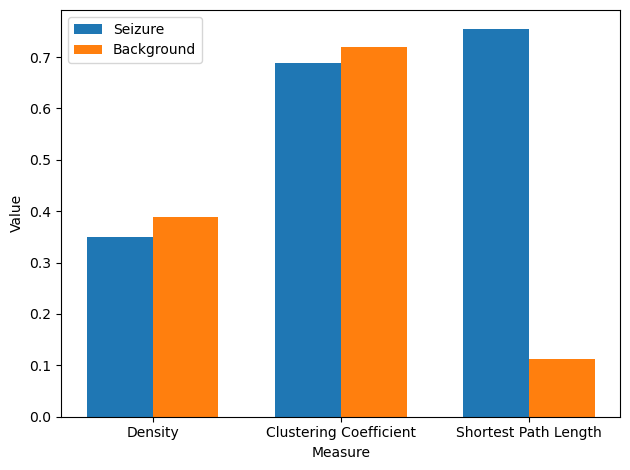

In [51]:
# Data
group_names = ['Seizure', 'Background']
values_group1 = [features_seizure_bi['density'], features_seizure_bi['clustering_coefficient'], 20*features_seizure['average_shortest_path_length']]
values_group2 = [features_background_bi['density'], features_background_bi['clustering_coefficient'], 20*features_background['average_shortest_path_length']]
x = np.arange(len(values_group1))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_group1, width, label='Seizure')
rects2 = ax.bar(x + width/2, values_group2, width, label='Background')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Measure')
ax.set_ylabel('Value')
# ax.set_title('Values by group and category')
ax.set_xticks(x)
ax.set_xticklabels(['Density', 'Clustering Coefficient', 'Shortest Path Length'])
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    # textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()


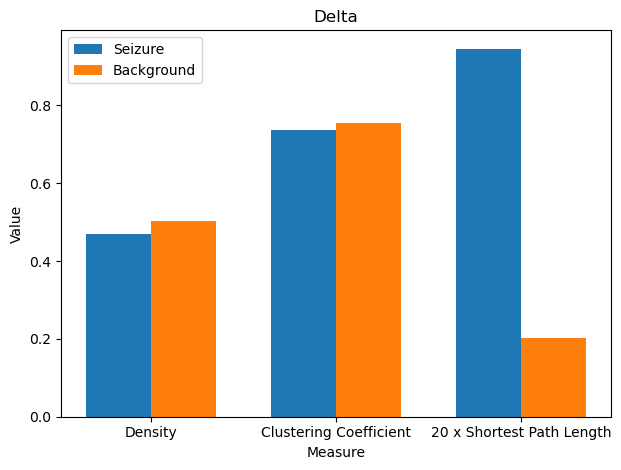

In [52]:
# Delta [1, 4]
data, times = seizure_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 1 , high_freq= 4)
# print("PLV Matrix:")
# print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 1 , high_freq= 4)
# print("PLV Matrix:")
# print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_epochs.ch_names
G_seizure = create_graph(plv_seizure, ch_names)
G_background = create_graph(plv_background, ch_names)
G_seizure_bi = create_graph_bi(plv_seizure, ch_names)
G_background_bi = create_graph_bi(plv_background, ch_names)

# Extract features
features_seizure = extract_graph_features(G_seizure)
features_background = extract_graph_features(G_background)
features_seizure_bi = extract_graph_features(G_seizure_bi)
features_background_bi = extract_graph_features(G_background_bi)


# Data
group_names = ['Seizure', 'Background']
values_group1 = [features_seizure_bi['density'], features_seizure_bi['clustering_coefficient'], 20*features_seizure['average_shortest_path_length']]
values_group2 = [features_background_bi['density'], features_background_bi['clustering_coefficient'], 20*features_background['average_shortest_path_length']]
x = np.arange(len(values_group1))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_group1, width, label='Seizure')
rects2 = ax.bar(x + width/2, values_group2, width, label='Background')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Measure')
ax.set_ylabel('Value')
ax.set_title('Delta')
ax.set_xticks(x)
ax.set_xticklabels(['Density', 'Clustering Coefficient', '20 x Shortest Path Length'])
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    # textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()


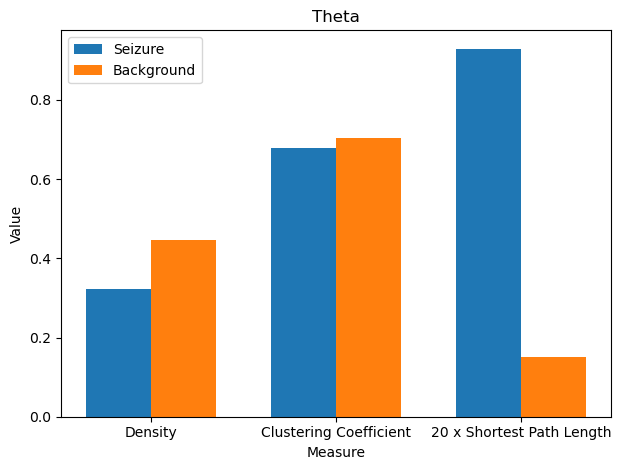

In [53]:
# Theta [4, 8]
data, times = seizure_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 4 , high_freq= 8)
# print("PLV Matrix:")
# print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 4 , high_freq= 8)
# print("PLV Matrix:")
# print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_epochs.ch_names
G_seizure = create_graph(plv_seizure, ch_names)
G_background = create_graph(plv_background, ch_names)
G_seizure_bi = create_graph_bi(plv_seizure, ch_names)
G_background_bi = create_graph_bi(plv_background, ch_names)

# Extract features
features_seizure = extract_graph_features(G_seizure)
features_background = extract_graph_features(G_background)
features_seizure_bi = extract_graph_features(G_seizure_bi)
features_background_bi = extract_graph_features(G_background_bi)


# Data
group_names = ['Seizure', 'Background']
values_group1 = [features_seizure_bi['density'], features_seizure_bi['clustering_coefficient'], 20*features_seizure['average_shortest_path_length']]
values_group2 = [features_background_bi['density'], features_background_bi['clustering_coefficient'], 20*features_background['average_shortest_path_length']]
x = np.arange(len(values_group1))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_group1, width, label='Seizure')
rects2 = ax.bar(x + width/2, values_group2, width, label='Background')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Measure')
ax.set_ylabel('Value')
ax.set_title('Theta')
ax.set_xticks(x)
ax.set_xticklabels(['Density', 'Clustering Coefficient', '20 x Shortest Path Length'])
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    # textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()


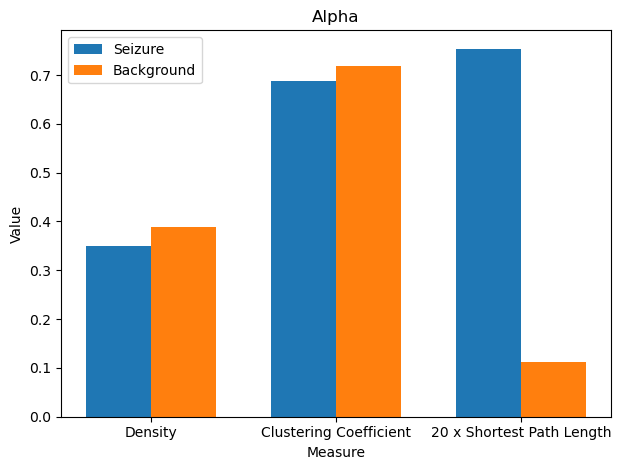

In [54]:
# Alpha [8, 13]
data, times = seizure_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 8 , high_freq= 13)
# print("PLV Matrix:")
# print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 8 , high_freq= 13)
# print("PLV Matrix:")
# print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_epochs.ch_names
G_seizure = create_graph(plv_seizure, ch_names)
G_background = create_graph(plv_background, ch_names)
G_seizure_bi = create_graph_bi(plv_seizure, ch_names)
G_background_bi = create_graph_bi(plv_background, ch_names)

# Extract features
features_seizure = extract_graph_features(G_seizure)
features_background = extract_graph_features(G_background)
features_seizure_bi = extract_graph_features(G_seizure_bi)
features_background_bi = extract_graph_features(G_background_bi)


# Data
group_names = ['Seizure', 'Background']
values_group1 = [features_seizure_bi['density'], features_seizure_bi['clustering_coefficient'], 20*features_seizure['average_shortest_path_length']]
values_group2 = [features_background_bi['density'], features_background_bi['clustering_coefficient'], 20*features_background['average_shortest_path_length']]
x = np.arange(len(values_group1))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_group1, width, label='Seizure')
rects2 = ax.bar(x + width/2, values_group2, width, label='Background')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Measure')
ax.set_ylabel('Value')
ax.set_title('Alpha')
ax.set_xticks(x)
ax.set_xticklabels(['Density', 'Clustering Coefficient', '20 x Shortest Path Length'])
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    # textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()


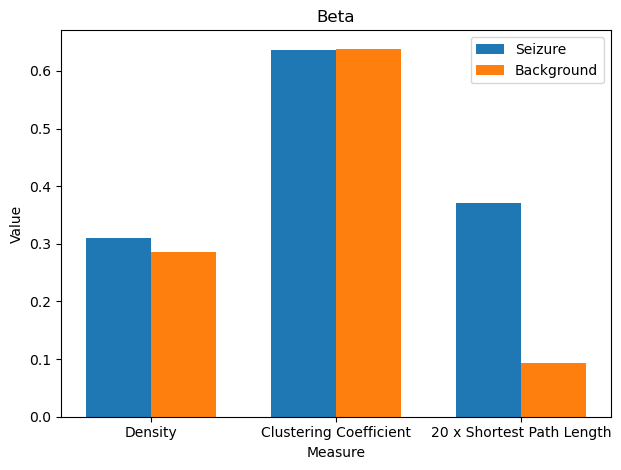

In [55]:
# Beta [13, 30]
data, times = seizure_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 13 , high_freq= 30)
# print("PLV Matrix:")
# print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 13 , high_freq= 30)
# print("PLV Matrix:")
# print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_epochs.ch_names
G_seizure = create_graph(plv_seizure, ch_names)
G_background = create_graph(plv_background, ch_names)
G_seizure_bi = create_graph_bi(plv_seizure, ch_names)
G_background_bi = create_graph_bi(plv_background, ch_names)

# Extract features
features_seizure = extract_graph_features(G_seizure)
features_background = extract_graph_features(G_background)
features_seizure_bi = extract_graph_features(G_seizure_bi)
features_background_bi = extract_graph_features(G_background_bi)


# Data
group_names = ['Seizure', 'Background']
values_group1 = [features_seizure_bi['density'], features_seizure_bi['clustering_coefficient'], 20*features_seizure['average_shortest_path_length']]
values_group2 = [features_background_bi['density'], features_background_bi['clustering_coefficient'], 20*features_background['average_shortest_path_length']]
x = np.arange(len(values_group1))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_group1, width, label='Seizure')
rects2 = ax.bar(x + width/2, values_group2, width, label='Background')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Measure')
ax.set_ylabel('Value')
ax.set_title('Beta')
ax.set_xticks(x)
ax.set_xticklabels(['Density', 'Clustering Coefficient', '20 x Shortest Path Length'])
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    # textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()


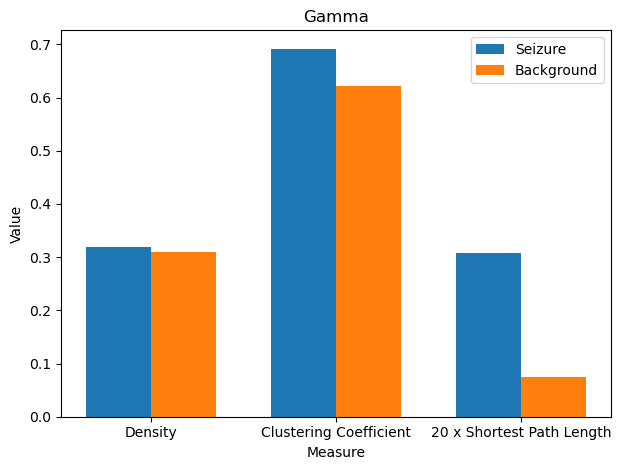

In [56]:
# Gamma [30, 50]
data, times = seizure_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 30 , high_freq= 50)
# print("PLV Matrix:")
# print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_epochs[:]
plv_matrix = calculate_plv(data, sfreq, low_freq= 30 , high_freq= 50)
# print("PLV Matrix:")
# print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_epochs.ch_names
G_seizure = create_graph(plv_seizure, ch_names)
G_background = create_graph(plv_background, ch_names)
G_seizure_bi = create_graph_bi(plv_seizure, ch_names)
G_background_bi = create_graph_bi(plv_background, ch_names)

# Extract features
features_seizure = extract_graph_features(G_seizure)
features_background = extract_graph_features(G_background)
features_seizure_bi = extract_graph_features(G_seizure_bi)
features_background_bi = extract_graph_features(G_background_bi)


# Data
group_names = ['Seizure', 'Background']
values_group1 = [features_seizure_bi['density'], features_seizure_bi['clustering_coefficient'], 20*features_seizure['average_shortest_path_length']]
values_group2 = [features_background_bi['density'], features_background_bi['clustering_coefficient'], 20*features_background['average_shortest_path_length']]
x = np.arange(len(values_group1))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_group1, width, label='Seizure')
rects2 = ax.bar(x + width/2, values_group2, width, label='Background')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Measure')
ax.set_ylabel('Value')
ax.set_title('Gamma')
ax.set_xticks(x)
ax.set_xticklabels(['Density', 'Clustering Coefficient', '20 x Shortest Path Length'])
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    # textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()
